### BeH2

In this work we are trying to find the ground state of BeH2. 
BeH2 is a molecule with a linear structure, which means all the atoms are laying on one straight line.
Bond distance of the molecule is 133.376 pm. In the units of Hartree this bond length is 133.376e-12/5.291772e-11 which is equal to 2.52044.

Therefore we can define the  define the positions as follow:

H=( 0 , 0 , -2.52044)

Be=(0 ,0 ,0) 

H=(0, 0, 2.52044 )

In this way, we are aligning the molecule along z axis. It is important to mention that X,Y, and Z axis here are arbitrary and the choice of axis to put the ion on will not change the final results as longs relative position of ions are conserved.

Soon will notice that different bond lengths have reported in numerical caclculations. We used the experimental value for bond length but we also plot the ground state energy for different bond lengths to find the minimum bond lenght and energy corresponding to that and see how close it is to experimental data.

In [79]:
#Importing numpy and qml modules
%matplotlib notebook
from pennylane import numpy as np
import pennylane as qml
plt.ion()

#Defining the symbols and coordinates of the molecule
symbols = ["H", "Be", "H"]
coordinates = np.array([0.0, 0.0, -2.52044, 0.0, 0.0, 0.0, 0.0, 0.0, 2.52044])

In [37]:
# Importing Chemistry module from Pennylane
from pennylane import qchem

#Setting up the molecule Hamiltonian
H, qubits = qchem.molecular_hamiltonian(symbols, coordinates)
print("Number of qubits: {:}".format(qubits))
print("Qubit Hamiltonian")
print(H)

Number of qubits: 14
Qubit Hamiltonian
  (-8.717704999794782) [I0]
+ (-0.4723528911292888) [Z12]
+ (-0.4723528911292888) [Z13]
+ (-0.26344485350649566) [Z11]
+ (-0.26344485350649555) [Z10]
+ (-0.14798615919025118) [Z9]
+ (-0.14798615919025115) [Z8]
+ (-0.14798615919024155) [Z7]
+ (-0.14798615919024138) [Z6]
+ (-0.023454337440255456) [Z4]
+ (-0.023454337440255345) [Z5]
+ (0.006846404627244937) [Z2]
+ (0.006846404627245051) [Z3]
+ (2.2156629200431057) [Z0]
+ (2.2156629200431066) [Z1]
+ (-0.04963907202286616) [Y0 Y2]
+ (-0.04963907202286616) [X0 X2]
+ (-0.001675128636824936) [Y1 Y3]
+ (-0.001675128636824936) [X1 X3]
+ (0.06178110823566697) [Z2 Z4]
+ (0.06178110823566697) [Z3 Z5]
+ (0.07373852099001793) [Z10 Z12]
+ (0.07373852099001793) [Z11 Z13]
+ (0.07907358807585213) [Z6 Z10]
+ (0.07907358807585213) [Z7 Z11]
+ (0.07907358807586402) [Z8 Z10]
+ (0.07907358807586402) [Z9 Z11]
+ (0.07971842160115704) [Z2 Z10]
+ (0.07971842160115704) [Z3 Z11]
+ (0.07989524779741429) [Z2 Z6]
+ (0.079895247797

In [40]:
#Defining the active space
charge=0
multiplicity=1
basis_set="sto-3g"
electrons = 6
orbitals = 7
core, active = qchem.active_space(electrons, orbitals, active_electrons=4, active_orbitals=4)

In [41]:
# We will have on core orbital that belongs to 1s of Be atom
print("List of core orbitals: {:}".format(core))
# We will have 4 active orbitals which is made from 1s orbital of Hydrogen and \
#hybridization of 2s and 2p_z of Be ion 
print("List of active orbitals: {:}".format(active))
print("Number of qubits: {:}".format(2 * len(active)))

List of core orbitals: [0]
List of active orbitals: [1, 2, 3, 4]
Number of qubits: 8


In [49]:
#Reproduce the molecular hamiltonian in a simpler system that reduces the calculation time.
H, qubits = qchem.molecular_hamiltonian(
    symbols,
    coordinates,
    charge=charge,
    mult=multiplicity,
    basis=basis_set,
    active_electrons=4,
    active_orbitals=4,
)
#We can see number of needed qubits significantly reduced.
print("Number of qubits required to perform quantum simulations: {:}".format(qubits))
print("Hamiltonian of the BeH$_2$ molecule")
print(H)

Number of qubits required to perform quantum simulations: 8
Hamiltonian of the BeH$_2$ molecule
  (-14.492948851535932) [I0]
+ (-0.06641803989629397) [Z5]
+ (-0.06641803989629393) [Z4]
+ (-0.06641803989628393) [Z6]
+ (-0.06641803989628392) [Z7]
+ (0.13477774081686955) [Z2]
+ (0.13477774081686958) [Z3]
+ (0.14843705886565844) [Z0]
+ (0.14843705886565847) [Z1]
+ (0.06178110823566376) [Z0 Z2]
+ (0.06178110823566376) [Z1 Z3]
+ (0.079895247797381) [Z0 Z4]
+ (0.079895247797381) [Z1 Z5]
+ (0.07989524779743384) [Z0 Z6]
+ (0.07989524779743384) [Z1 Z7]
+ (0.08541186379474729) [Z2 Z4]
+ (0.08541186379474729) [Z3 Z5]
+ (0.08541186379480378) [Z2 Z6]
+ (0.08541186379480378) [Z3 Z7]
+ (0.0890684698590073) [Z2 Z5]
+ (0.0890684698590073) [Z3 Z4]
+ (0.08906846985906622) [Z2 Z7]
+ (0.08906846985906622) [Z3 Z6]
+ (0.09224415969104108) [Z0 Z5]
+ (0.09224415969104108) [Z1 Z4]
+ (0.09224415969110211) [Z0 Z7]
+ (0.09224415969110211) [Z1 Z6]
+ (0.09427773555502886) [Z4 Z6]
+ (0.09427773555502886) [Z5 Z7]
+ (0.

Finding the right ansatz is always the tricky part to use VQE. Here the approach we are using excitations
that conserve the spin state of the molecule. Next we can see single and double excitations that conserve
the spin. The reason that this approach was used is to conserve the S=0 symmetry of the molecule.

In [50]:
#Finding the Hartree Fock state for the molecule we defined
hf = qml.qchem.hf_state(electrons, qubits)
print(hf)

#Finding the excitations that conserves the S_Z.
singles, doubles = qml.qchem.excitations(electrons, qubits, delta_sz=0)
print(singles)
print(doubles)

[1 1 1 1 1 1 0 0]
[[0, 6], [1, 7], [2, 6], [3, 7], [4, 6], [5, 7]]
[[0, 1, 6, 7], [0, 3, 6, 7], [0, 5, 6, 7], [1, 2, 6, 7], [1, 4, 6, 7], [2, 3, 6, 7], [2, 5, 6, 7], [3, 4, 6, 7], [4, 5, 6, 7]]


In [51]:
#Constructing the circuit
dev = qml.device("default.qubit", wires=qubits)

def circuit(params,wires):
    qml.AllSinglesDoubles(params, wires, hf, singles, doubles)
    

In [52]:
#Defining cost function and define the initial state
@qml.qnode(dev)
def cost_fn(params):
    circuit(params, wires=range(qubits))
    return qml.expval(H)
#optimizer:
opt = qml.GradientDescentOptimizer(stepsize=0.8)
#defining the initial value
np.random.seed(0)  # for reproducibility
theta = np.random.normal(0, np.pi, len(singles) + len(doubles), requires_grad=True)
print(theta)

[ 5.54193389  1.25713095  3.07479606  7.03997361  5.86710646 -3.07020901
  2.98479079 -0.47550269 -0.32427159  1.28993324  0.45252622  4.56873497
  2.39087053  0.38225334  1.39443747]


In [53]:
# store the values of the cost function
energy1 = [cost_fn(theta)]

max_iterations = 1000
conv_tol = 1e-06

for n in range(max_iterations):

    theta, prev_energy = opt.step_and_cost(cost_fn, theta)

    energy = cost_fn(theta)
    energy1.append(energy)

    conv = np.abs(energy - prev_energy)
    
    
    
    # Helps to follow progress while code is running
    if n % 50 == 0:
        print(f"Step = {n}, Energy = {energy:.8f} Ha")

    if conv <= conv_tol:
        break

print("\n" f"Final value of the energy = {energy:.8f} Ha")
print("\n" f"Optimal value of the circuit parameters = {theta}")

Step = 0, Energy = -13.91566551 Ha
Step = 50, Energy = -14.72413851 Ha
Step = 100, Energy = -14.73426801 Ha
Step = 150, Energy = -14.73562661 Ha
Step = 200, Energy = -14.73613168 Ha
Step = 250, Energy = -14.73646817 Ha
Step = 300, Energy = -14.73678746 Ha
Step = 350, Energy = -14.73714206 Ha
Step = 400, Energy = -14.73756502 Ha
Step = 450, Energy = -14.73809760 Ha
Step = 500, Energy = -14.73880505 Ha
Step = 550, Energy = -14.73979560 Ha
Step = 600, Energy = -14.74124987 Ha
Step = 650, Energy = -14.74344373 Ha
Step = 700, Energy = -14.74664575 Ha
Step = 750, Energy = -14.75066979 Ha
Step = 800, Energy = -14.75457188 Ha
Step = 850, Energy = -14.75728676 Ha
Step = 900, Energy = -14.75847084 Ha
Step = 950, Energy = -14.75880885 Ha

Final value of the energy = -14.75888658 Ha

Optimal value of the circuit parameters = [ 3.89219306e+00  3.14159417e+00  3.14164935e+00  6.63892283e+00
  7.09542511e+00 -1.71765176e+00 -7.96001792e-06  1.65890295e-04
  2.66243205e-05  6.51649813e-01  1.43374715e

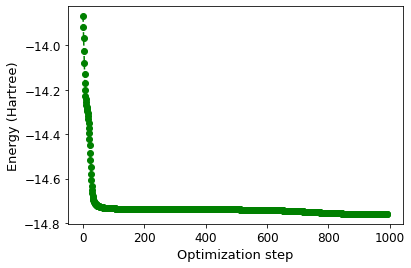

In [54]:
import matplotlib.pyplot as plt
#Plotting the convergence we can see it gets really close to convergence after ~ 50 steps
plt.figure()
plt.plot(range(n + 2), energy1, "go", ls="dashed")
plt.xlabel("Optimization step", fontsize=13)
plt.ylabel("Energy (Hartree)", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Now we are doing the same steps but this time we have a different approach for ansatz, here we only consider HF and states that changes the spin to 1. As we can see they also converge fast, but converge to a higher energy state. Therefore ansatz that keeps the spin to zero seems to be more suitable for our case.

In [55]:
# make the Hartree Fock state and find the excitations that change the spin to 1
hf = qml.qchem.hf_state(electrons, qubits)
print(hf)
singles_sz1, doubles_sz1 = qml.qchem.excitations(electrons, qubits, delta_sz=1)
print(singles_sz1)
print(doubles_sz1)
singles_szneg1, doubles_szneg1 = qml.qchem.excitations(electrons, qubits, delta_sz=-1)
print(singles_sz2)
print(doubles_sz2)

singles=singles_sz1+singles_szneg1
doubles=doubles_sz1+doubles_szneg1

dev = qml.device("default.qubit", wires=qubits)

def circuit(params,wires):
    qml.AllSinglesDoubles(params, wires, hf, singles, doubles)
    

[1 1 1 1 1 1 0 0]
[[1, 6], [3, 6], [5, 6]]
[[1, 3, 6, 7], [1, 5, 6, 7], [3, 5, 6, 7]]
[[0, 7], [2, 7], [4, 7]]
[[0, 2, 6, 7], [0, 4, 6, 7], [2, 4, 6, 7]]


In [56]:
@qml.qnode(dev)
def cost_fn(params):
    circuit(params, wires=range(qubits))
    return qml.expval(H)

opt = qml.GradientDescentOptimizer(stepsize=0.8)
np.random.seed(0)  # for reproducibility
theta = np.random.normal(0, np.pi, len(singles) + len(doubles), requires_grad=True)
print(theta)

[ 5.54193389  1.25713095  3.07479606  7.03997361  5.86710646 -3.07020901
  2.98479079 -0.47550269 -0.32427159  1.28993324  0.45252622  4.56873497]


In [57]:
# store the values of the cost function
energy1 = [cost_fn(theta)]

max_iterations = 1500
conv_tol = 1e-06

for n in range(max_iterations):

    theta, prev_energy = opt.step_and_cost(cost_fn, theta)

    energy = cost_fn(theta)
    energy1.append(energy)

    conv = np.abs(energy - prev_energy)

    if n % 50 == 0:
        print(f"Step = {n}, Energy = {energy:.8f} Ha")

    if conv <= conv_tol:
        break

print("\n" f"Final value of the energy = {energy:.8f} Ha")
print("\n" f"Optimal value of the circuit parameters = {theta}")

Step = 0, Energy = -14.10685418 Ha
Step = 50, Energy = -14.31999911 Ha
Step = 100, Energy = -14.32613450 Ha
Step = 150, Energy = -14.32828622 Ha
Step = 200, Energy = -14.32891239 Ha
Step = 250, Energy = -14.32908341 Ha

Final value of the energy = -14.32910911 Ha

Optimal value of the circuit parameters = [ 3.20845378  3.13359286  3.13075606  7.04238765  5.86066964 -3.06982512
  3.14123319 -0.48363116 -0.33796148  1.26582007  0.45400217  4.56383489]


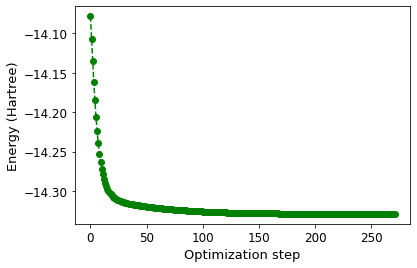

In [58]:

# Plotting convergence.
plt.figure()
plt.plot(range(n + 2), energy1, "go", ls="dashed")
plt.xlabel("Optimization step", fontsize=13)
plt.ylabel("Energy (Hartree)", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The next logical steps is that combine the 2 ansatz to see if it gives us andvantage? (Spoiler Alert! Not really)

In [59]:
hf = qml.qchem.hf_state(electrons, qubits)
print(hf)
singles_sz0, doubles_sz0 = qml.qchem.excitations(electrons, qubits, delta_sz=0)
print(singles_sz0)
print(doubles_sz0)
singles_sz1, doubles_sz1 = qml.qchem.excitations(electrons, qubits, delta_sz=1)
print(singles_sz1)
print(doubles_sz1)
singles_szneg1, doubles_szneg1 = qml.qchem.excitations(electrons, qubits, delta_sz=-1)
print(singles_szneg1)
print(doubles_szneg1)

singles=singles_sz0+singles_sz1+singles_szneg1
doubles=doubles_sz0+doubles_sz1+doubles_szneg1

#singles=singles_sz1+singles_sz2
#doubles=doubles_sz1+doubles_sz2


dev = qml.device("default.qubit", wires=qubits)

def circuit(params,wires):
    #qml.BasisState(hf,wires=wires)
    qml.AllSinglesDoubles(params, wires, hf, singles, doubles)
    

[1 1 1 1 1 1 0 0]
[[0, 6], [1, 7], [2, 6], [3, 7], [4, 6], [5, 7]]
[[0, 1, 6, 7], [0, 3, 6, 7], [0, 5, 6, 7], [1, 2, 6, 7], [1, 4, 6, 7], [2, 3, 6, 7], [2, 5, 6, 7], [3, 4, 6, 7], [4, 5, 6, 7]]
[[1, 6], [3, 6], [5, 6]]
[[1, 3, 6, 7], [1, 5, 6, 7], [3, 5, 6, 7]]
[[0, 7], [2, 7], [4, 7]]
[[0, 2, 6, 7], [0, 4, 6, 7], [2, 4, 6, 7]]


In [64]:
@qml.qnode(dev)
def cost_fn(params):
    circuit(params, wires=range(qubits))
    return qml.expval(H)

opt = qml.GradientDescentOptimizer(stepsize=1.2)
np.random.seed(0)  # for reproducibility
theta = np.random.normal(0, np.pi, len(singles) + len(doubles), requires_grad=True)
print(theta)

[ 5.54193389  1.25713095  3.07479606  7.03997361  5.86710646 -3.07020901
  2.98479079 -0.47550269 -0.32427159  1.28993324  0.45252622  4.56873497
  2.39087053  0.38225334  1.39443747  1.04826882  4.69378784 -0.64452369
  0.98353119 -2.6832209  -8.02045405  2.05340338  2.71570641 -2.33158018
  7.13064445 -4.56902452  0.14375462]


In [65]:
# store the values of the cost function
energy1 = [cost_fn(theta)]

max_iterations = 1000
conv_tol = 1e-8

for n in range(max_iterations):

    theta, prev_energy = opt.step_and_cost(cost_fn, theta)

    energy = cost_fn(theta)
    energy1.append(energy)

    conv = np.abs(energy - prev_energy)

    if n % 50 == 0:
        print(f"Step = {n}, Energy = {energy:.8f} Ha")

    if conv <= conv_tol:
        break

print("\n" f"Final value of the energy = {energy:.8f} Ha")
print("\n" f"Optimal value of the circuit parameters = {theta}")

Step = 0, Energy = -14.48300600 Ha
Step = 50, Energy = -14.75561205 Ha
Step = 100, Energy = -14.75836007 Ha
Step = 150, Energy = -14.75872147 Ha
Step = 200, Energy = -14.75883273 Ha
Step = 250, Energy = -14.75887978 Ha
Step = 300, Energy = -14.75890171 Ha
Step = 350, Energy = -14.75891236 Ha
Step = 400, Energy = -14.75891764 Ha
Step = 450, Energy = -14.75892029 Ha
Step = 500, Energy = -14.75892162 Ha

Final value of the energy = -14.75892227 Ha

Optimal value of the circuit parameters = [ 5.57651838  0.70692584  3.14571125  6.67949444  5.63329618 -3.15415708
  3.14157451  0.1423829  -0.69321155  3.1414524   0.70667076  3.14703333
  3.13475089  0.73542468  1.20105542  0.9827957   4.17893513 -0.64380672
  0.84478053 -2.6531798  -8.00671133  2.03460031  2.71294235 -2.33173025
  7.13093259 -4.56901889  0.1437619 ]


We can see it converges to a lower energy but the difference is negligible.

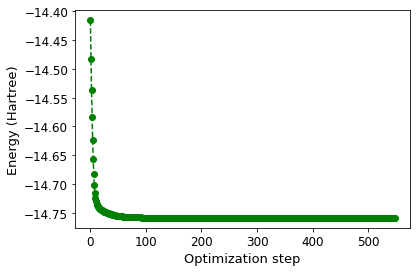

In [66]:
# Add energy plot on column 1
plt.figure()
plt.plot(range(n + 2), energy1, "go", ls="dashed")
plt.xlabel("Optimization step", fontsize=13)
plt.ylabel("Energy (Hartree)", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [75]:
# Doing the ground state for bound distance between 100 to 400 pm
bondlengths=np.linspace(1,3,7)
Min_energy=[]
for i in range(len(bondlengths)):
    symbols = ["H", "Be", "H"]
    coordinates = np.array([0.0, 0.0, -bondlengths[i]*1e-10/5.291772e-11, \
                            0.0, 0.0, 0.0, 0.0, 0.0,bondlengths[i]*1e-10/5.291772e-11 ])
    H, qubits = qchem.molecular_hamiltonian(symbols, coordinates)
    charge=0
    multiplicity=1
    basis_set="sto-3g"
    electrons = 6
    orbitals = 7
    core, active = qchem.active_space(electrons, orbitals, active_electrons=4, active_orbitals=4)
    H, qubits = qchem.molecular_hamiltonian(
    symbols,
    coordinates,
    charge=charge,
    mult=multiplicity,
    basis=basis_set,
    active_electrons=4,
    active_orbitals=4,
    )
    hf = qml.qchem.hf_state(electrons, qubits)
    #print(hf)
    singles_sz0, doubles_sz0 = qml.qchem.excitations(electrons, qubits, delta_sz=0)
    #print(singles_sz0)
    #print(doubles_sz0)
    

    singles=singles_sz0
    doubles=doubles_sz0

    #singles=singles_sz1+singles_sz2
    #doubles=doubles_sz1+doubles_sz2


    dev = qml.device("default.qubit", wires=qubits)

    def circuit(params,wires):
        #qml.BasisState(hf,wires=wires)
        qml.AllSinglesDoubles(params, wires, hf, singles, doubles)
    @qml.qnode(dev)
    def cost_fn(params):
        circuit(params, wires=range(qubits))
        return qml.expval(H)

    opt = qml.GradientDescentOptimizer(stepsize=0.8)
    np.random.seed(0)  # for reproducibility
    theta = np.random.normal(0, np.pi, len(singles) + len(doubles), requires_grad=True)
    #print(theta)
    
    # store the values of the cost function
    energy1 = [cost_fn(theta)]
    
    max_iterations = 1000
    conv_tol = 1e-8

    for n in range(max_iterations):

        theta, prev_energy = opt.step_and_cost(cost_fn, theta)

        energy = cost_fn(theta)
        energy1.append(energy)

        conv = np.abs(energy - prev_energy)

        #if n % 10 == 0:
            #print(f"Step = {n}, Energy = {energy:.8f} Ha")

        if conv <= conv_tol:
            break

    #print("\n" f"Final value of the energy = {energy:.8f} Ha")
    #print("\n" f"Optimal value of the circuit parameters = {theta}")
    Min_energy.append(energy1[-1])
    
    print("Minimum Energy for r = "+ str(bondlengths[i])+ " is "+str(energy1[-1])+".")
Min_energy=np.asarray(Min_energy)



Minimum Energy for r = 1.0 is -14.689726230112058.
Minimum Energy for r = 1.3333333333333333 is -14.758941024409685.
Minimum Energy for r = 1.6666666666666665 is -14.67892203037649.
Minimum Energy for r = 2.0 is -14.674970268505465.
Minimum Energy for r = 2.333333333333333 is -14.657920475466897.
Minimum Energy for r = 2.6666666666666665 is -14.652700358226951.
Minimum Energy for r = 3.0 is -14.654220157423403.


In [83]:
#Now we are gonna do a finer calculation around
# Doing the ground state for bound distance between 120 to 160 pm
bondlengths_fine=np.linspace(1.1,1.5,4)
Min_energy_fine=[]
for i in range(len(bondlengths_fine)):
    symbols = ["H", "Be", "H"]
    coordinates = np.array([0.0, 0.0, -bondlengths_fine[i]*1e-10/5.291772e-11, \
                            0.0, 0.0, 0.0, 0.0, 0.0,bondlengths_fine[i]*1e-10/5.291772e-11 ])
    H, qubits = qchem.molecular_hamiltonian(symbols, coordinates)
    charge=0
    multiplicity=1
    basis_set="sto-3g"
    electrons = 6
    orbitals = 7
    core, active = qchem.active_space(electrons, orbitals, active_electrons=4, active_orbitals=4)
    H, qubits = qchem.molecular_hamiltonian(
    symbols,
    coordinates,
    charge=charge,
    mult=multiplicity,
    basis=basis_set,
    active_electrons=4,
    active_orbitals=4,
    )
    hf = qml.qchem.hf_state(electrons, qubits)
    #print(hf)
    singles_sz0, doubles_sz0 = qml.qchem.excitations(electrons, qubits, delta_sz=0)
    #print(singles_sz0)
    #print(doubles_sz0)
    

    singles=singles_sz0
    doubles=doubles_sz0

    #singles=singles_sz1+singles_sz2
    #doubles=doubles_sz1+doubles_sz2


    dev = qml.device("default.qubit", wires=qubits)

    def circuit(params,wires):
        #qml.BasisState(hf,wires=wires)
        qml.AllSinglesDoubles(params, wires, hf, singles, doubles)
    @qml.qnode(dev)
    def cost_fn(params):
        circuit(params, wires=range(qubits))
        return qml.expval(H)

    opt = qml.GradientDescentOptimizer(stepsize=0.8)
    np.random.seed(0)  # for reproducibility
    theta = np.random.normal(0, np.pi, len(singles) + len(doubles), requires_grad=True)
    #print(theta)
    
    # store the values of the cost function
    energy1 = [cost_fn(theta)]
    
    max_iterations = 1000
    conv_tol = 1e-6

    for n in range(max_iterations):

        theta, prev_energy = opt.step_and_cost(cost_fn, theta)

        energy = cost_fn(theta)
        energy1.append(energy)

        conv = np.abs(energy - prev_energy)

        #if n % 10 == 0:
            #print(f"Step = {n}, Energy = {energy:.8f} Ha")

        if conv <= conv_tol:
            break

    #print("\n" f"Final value of the energy = {energy:.8f} Ha")
    #print("\n" f"Optimal value of the circuit parameters = {theta}")
    Min_energy_fine.append(energy1[-1])
    
    print("Minimum Energy for r = "+ str(bondlengths_fine[i])+ " is "+str(energy1[-1])+".")
Min_energy_fine=np.asarray(Min_energy_fine)



Minimum Energy for r = 1.1 is -14.741085480845229.
Minimum Energy for r = 1.2333333333333334 is -14.763626645001118.
Minimum Energy for r = 1.3666666666666667 is -14.754567519639178.
Minimum Energy for r = 1.5 is -14.727315145669168.


At the last step we also going to do redo the fine step with the ansatz that has excitation that keeps the spin to zero and excitations that changes the spin to 1.

In [84]:
#Now we are gonna do a finer calculation around
# Doing the ground state for bound distance between 120 to 160 pm
bondlengths_fine_big=np.linspace(1.2,1.6,4)
Min_energy_fine_big=[]
for i in range(len(bondlengths_fine_big)):
    symbols = ["H", "Be", "H"]
    coordinates = np.array([0.0, 0.0, -bondlengths_fine_big[i]*1e-10/5.291772e-11, \
                            0.0, 0.0, 0.0, 0.0, 0.0,bondlengths_fine_big[i]*1e-10/5.291772e-11 ])
    H, qubits = qchem.molecular_hamiltonian(symbols, coordinates)
    charge=0
    multiplicity=1
    basis_set="sto-3g"
    electrons = 6
    orbitals = 7
    core, active = qchem.active_space(electrons, orbitals, active_electrons=4, active_orbitals=4)
    H, qubits = qchem.molecular_hamiltonian(
    symbols,
    coordinates,
    charge=charge,
    mult=multiplicity,
    basis=basis_set,
    active_electrons=4,
    active_orbitals=4,
    )
    hf = qml.qchem.hf_state(electrons, qubits)
    #print(hf)
    singles_sz0, doubles_sz0 = qml.qchem.excitations(electrons, qubits, delta_sz=0)
    #print(singles_sz0)
    #print(doubles_sz0)
    singles_sz1, doubles_sz1 = qml.qchem.excitations(electrons, qubits, delta_sz=1)
    #print(singles_sz1)
    #print(doubles_sz1)
    singles_szneg1, doubles_szneg1 = qml.qchem.excitations(electrons, qubits, delta_sz=-1)
    #print(singles_szneg1)
    #print(doubles_szneg1)

    singles=singles_sz0+singles_sz1+singles_szneg1
    doubles=doubles_sz0+doubles_sz1+doubles_szneg1

    #singles=singles_sz1+singles_sz2
    #doubles=doubles_sz1+doubles_sz2


    dev = qml.device("default.qubit", wires=qubits)

    def circuit(params,wires):
        #qml.BasisState(hf,wires=wires)
        qml.AllSinglesDoubles(params, wires, hf, singles, doubles)
    @qml.qnode(dev)
    def cost_fn(params):
        circuit(params, wires=range(qubits))
        return qml.expval(H)

    opt = qml.GradientDescentOptimizer(stepsize=0.8)
    np.random.seed(0)  # for reproducibility
    theta = np.random.normal(0, np.pi, len(singles) + len(doubles), requires_grad=True)
    #print(theta)
    
    # store the values of the cost function
    energy1 = [cost_fn(theta)]
    
    max_iterations = 1000
    conv_tol = 1e-6

    for n in range(max_iterations):

        theta, prev_energy = opt.step_and_cost(cost_fn, theta)

        energy = cost_fn(theta)
        energy1.append(energy)

        conv = np.abs(energy - prev_energy)

        #if n % 10 == 0:
            #print(f"Step = {n}, Energy = {energy:.8f} Ha")

        if conv <= conv_tol:
            break

    #print("\n" f"Final value of the energy = {energy:.8f} Ha")
    #print("\n" f"Optimal value of the circuit parameters = {theta}")
    Min_energy_fine_big.append(energy1[-1])
    
    print("Minimum Energy for r = "+ str(bondlengths_fine_big[i])+ " is "+str(energy1[-1])+".")
Min_energy_fine_big=np.asarray(Min_energy_fine_big)



Minimum Energy for r = 1.2 is -14.761598145357874.
Minimum Energy for r = 1.3333333333333333 is -14.758874904341326.
Minimum Energy for r = 1.4666666666666668 is -14.735291472080172.
Minimum Energy for r = 1.6 is -14.699584847873112.


Here we compare with the references:
Comparing with the work from [IBM](https://www.nature.com/articles/nature23879) and [Grimsley et al.](https://arxiv.org/pdf/1812.11173.pdf), we noticed that the groound state energy we found is about 1 Ha energy unit larger than other reported data. We also think the bond length reported by Grimsley is twice as large is the real bond length of BeH2. We also tried to do DFT and compare the results with DFT but it did not converge before the deadline for Hackathon.

<IPython.core.display.Javascript object>


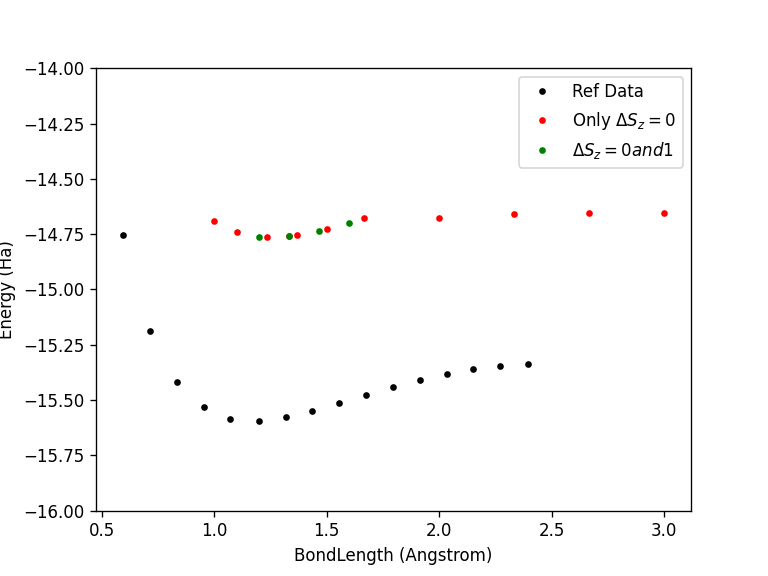

In [88]:
RefData=np.loadtxt('Refdata.txt',dtype=float,delimiter='\t')

plt.figure()
plt.plot(RefData[:,1]/2,RefData[:,0],color='k',marker='.',ls='', label="Ref Data")
plt.plot(bondlengths,Min_energy,color='r',marker='.',ls='',label="Only $\Delta S_z =0$")
plt.plot(bondlengths_fine,Min_energy_fine,color='r',marker='.',ls='')
plt.plot(bondlengths_fine_big,Min_energy_fine_big,color='g',marker='.',ls='',label="$\Delta S_z =0 and 1$")
plt.legend()
plt.ylim(-16,-14)
plt.xlabel("BondLength (Angstrom)")
plt.ylabel("Energy (Ha)")
plt.show()

In conclusion, in our calculation we noticed that in our calculation the ground state energy is higher than all other reported results. This can be due to how the basis state is defined. We are not sure if our ansatz missing possible states that can lower the ground state even lower.